In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv('advertising_spend_vs_sales_revenue.csv')
print(f"Shape :{df.shape}")
df.head()

Shape :(500, 2)


,Advertising Spend ($),Sales Revenue ($)
0,2743.579875,10562.775144
1,8798.436865,29248.946706
2,7994.517614,28648.516173
3,6618.673163,22403.006889
4,8520.759118,33363.200297


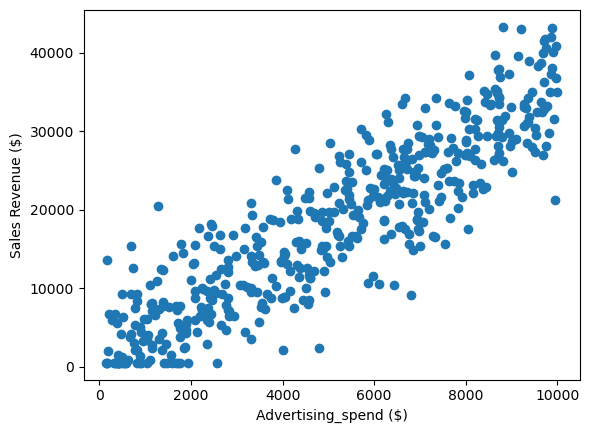

In [3]:
plt.scatter(df["Advertising Spend ($)"],df["Sales Revenue ($)"])
plt.xlabel("Advertising_spend ($)")
plt.ylabel("Sales Revenue ($)")
plt.show()

In [4]:
df.corr()

,Advertising Spend ($),Sales Revenue ($)
Advertising Spend ($),1.000000,0.897125
Sales Revenue ($),0.897125,1.000000


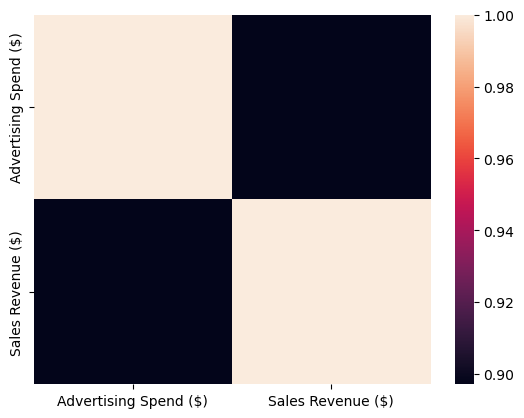

In [5]:
sns.heatmap(df.corr())
plt.show()

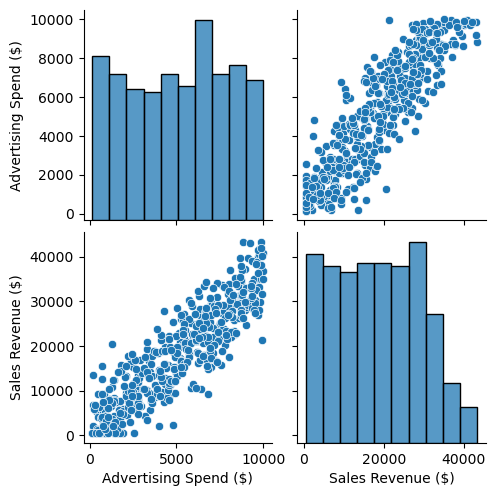

In [6]:
sns.pairplot(df)
plt.show()

### Creating dependent and independent variables

In [7]:
X=df[["Advertising Spend ($)"]]
y=df["Sales Revenue ($)"]

###  Segregating data for training and testing

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=20)

In [9]:
X_train.shape

(375, 1)

In [10]:
X_test.shape

(125, 1)

### Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)


LinearRegression(n_jobs=-1)

In [13]:
regression.coef_

array([9748.83333503])

In [14]:
regression.intercept_

18127.44000141425

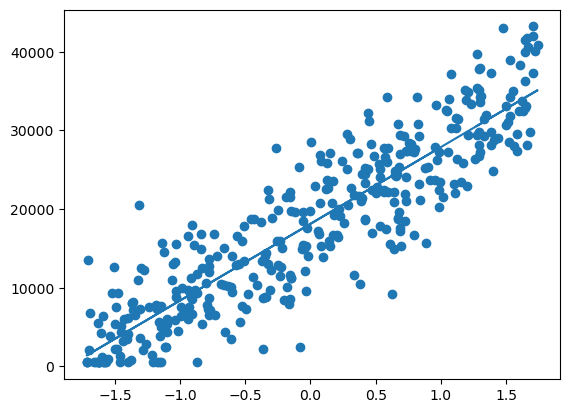

In [15]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [16]:
y_pred=regression.predict(X_test)

### Performance metrics

### MSE,MAE and RMSE

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"""Mean squared error : {mse}
Mean absolute error : {mae}
Root mean squared error :{rmse}""")

Mean squared error : 24571224.69222145
Mean absolute error : 3805.631509553808
Root mean squared error :4956.9370272600245


### R^2 and Adjusted R^2

In [19]:
from sklearn.metrics import r2_score

In [20]:
score=r2_score(y_test,y_pred)
score

0.7890997488819291

In [21]:
Adjusted_R2=1-(1-score)*(len(y_test)-1)/len(y_test)-X_test.shape[1]-1
Adjusted_R2

-1.2092130491091262

### OLS linear regression

In [22]:
import statsmodels.api as sm

In [23]:
model=sm.OLS(y_train,X_train).fit()

In [24]:
prediction=model.predict(X_test)

In [25]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Sales Revenue ($)   R-squared (uncentered):                   0.213
Model:                            OLS   Adj. R-squared (uncentered):              0.211
Method:                 Least Squares   F-statistic:                              101.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):                    3.08e-21
Time:                        08:30:53   Log-Likelihood:                         -4221.4
No. Observations:                 375   AIC:                                      8445.
Df Residuals:                     374   BIC:                                      8449.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Prediction of a new data point

In [26]:
new_spend=regression.predict(scaler.transform([[20000]]))
new_spend

c:\Users\anith\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([69520.14743495])